<a href="https://colab.research.google.com/github/jbonesTroy/Intro-to-Machine-Learning/blob/main/Homework4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset samples (rows): 569
Number of features (columns): 30
Target vector size: 569
Classes: ['malignant', 'benign']
------------------------------------------------------------
Training set size: 426
Testing set size : 143
------------------------------------------------------------
GaussianNB Test Accuracy (score): 0.9371
Confusion Matrix:
 [[46  7]
 [ 2 88]]

Classification Report:
               precision    recall  f1-score   support

   malignant       0.96      0.87      0.91        53
      benign       0.93      0.98      0.95        90

    accuracy                           0.94       143
   macro avg       0.94      0.92      0.93       143
weighted avg       0.94      0.94      0.94       143



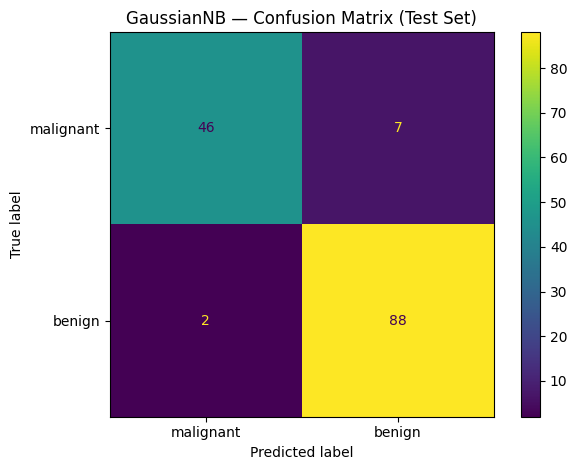

GaussianNB 10-fold CV Accuracy (Stratified): mean=0.9421, std=0.0249
------------------------------------------------------------
GaussianNB             CV Accuracy: mean=0.9421, std=0.0249
KNeighborsClassifier   CV Accuracy: mean=0.9315, std=0.0199
LogisticRegression     CV Accuracy: mean=0.9490, std=0.0183
SVC                    CV Accuracy: mean=0.9209, std=0.0141
------------------------------------------------------------
Best (by mean CV accuracy): LogisticRegression -> 0.9490 ± 0.0183


In [2]:
# 15.17 — Binary Classification with the Breast Cancer Dataset

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# -------------------------
# Loading the Dataset
# -------------------------
breast_cancer = load_breast_cancer()
X, y = breast_cancer.data, breast_cancer.target

# -------------------------
# Checking the Sample and Target Sizes
# -------------------------
print("Dataset samples (rows):", X.shape[0])
print("Number of features (columns):", X.shape[1])
print("Target vector size:", y.shape[0])
print("Classes:", list(map(str, breast_cancer.target_names)))
print("-" * 60)

# -------------------------
# Splitting the Data for Training and Testing
# -------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# -------------------------
# Training and Testing Set Sizes
# -------------------------
print("Training set size:", X_train.shape[0])
print("Testing set size :", X_test.shape[0])
print("-" * 60)

# -------------------------
# Creating the Model (GaussianNB)
# -------------------------
nb = GaussianNB()

# -------------------------
# Training the Model
# -------------------------
nb.fit(X_train, y_train)

# -------------------------
# Predicting
# -------------------------
y_pred = nb.predict(X_test)

# -------------------------
# Estimator Method score
# -------------------------
test_accuracy = nb.score(X_test, y_test)
print(f"GaussianNB Test Accuracy (score): {test_accuracy:.4f}")

# -------------------------
# Confusion Matrix
# -------------------------
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# -------------------------
# Classification Report
# -------------------------
print("\nClassification Report:\n",
      classification_report(y_test, y_pred, target_names=list(map(str, breast_cancer.target_names))))

# -------------------------
# Visualizing the Confusion Matrix
# -------------------------
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=list(map(str, breast_cancer.target_names)))
disp.plot(values_format='d')
plt.title("GaussianNB — Confusion Matrix (Test Set)")
plt.tight_layout()
plt.show()

# -------------------------
# Stratified K-Fold Cross-Validation (preferred for classification)
# -------------------------
skf = StratifiedKFold(n_splits=10, random_state=11, shuffle=True)
scores = cross_val_score(estimator=nb, X=X, y=y, cv=skf, scoring="accuracy")
print(f"GaussianNB 10-fold CV Accuracy (Stratified): mean={scores.mean():.4f}, std={scores.std():.4f}")
print("-" * 60)

# -------------------------
# Running Multiple Models to Find the Best One
# (LogisticRegression deprecation fix: remove multi_class override)
# -------------------------
estimators = {
    'GaussianNB': nb,
    'KNeighborsClassifier': KNeighborsClassifier(),
    'LogisticRegression': LogisticRegression(solver='lbfgs', max_iter=10000),
    'SVC': SVC(gamma='scale')
}

cv_results = []
for name, model in estimators.items():
    model_scores = cross_val_score(model, X, y, cv=skf, scoring="accuracy")
    cv_results.append((name, model_scores.mean(), model_scores.std()))
    print(f"{name:22s} CV Accuracy: mean={model_scores.mean():.4f}, std={model_scores.std():.4f}")

# Identify the best mean CV score
best_name, best_mean, best_std = sorted(cv_results, key=lambda t: t[1], reverse=True)[0]
print("-" * 60)
print(f"Best (by mean CV accuracy): {best_name} -> {best_mean:.4f} ± {best_std:.4f}")
